# An Exercise for a Summary?

After having gone through the Taylor series, forward and backward Euler, ODE solvers, iterative root finding methods and the stability of implicit and explicit systems, let’s take a look at a simple problem to bring these concepts into practice, all at once. This section shows you what a numerical code for solving differential equations looks like. The code itself is scalable for solving the most complicated differential equations in engineering such as the stress-strain equations, the Navier-Stokes equations and the Maxwell equations. 

Please go through this section while trying to write down everything on a piece of paper (to check how well you have understood the above-mentioned concepts). 

Consider the non-linear ODE

$$\dot{y}=\sin y^3 + \sin t, \hspace{10px} y(0)=1$$

Let’s solve by extracting terms from the Taylor series expansions to obtain the following:

$$\begin{split}
\begin{gather}
\text{Forward Euler: } y_{n+1}=y_n+\Delta t(\sin y_n^3 + \sin t_n)\\
\text{Backward Euler: } y_{n+1}=y_n+\Delta t(\sin y_{n+1}^3 + \sin t_{n+1})
\end{gather}
\end{split}
$$

Now, rewrite the above expressions in their residual forms to define a function $f$ such that the $f(y) = 0$, where $y$ is the root we are trying to find. 

$$
\begin{split}
\begin{gather}
\text{Forward Euler: } f(y_{n+1})=y_{n+1}-y_n-\Delta t(\sin y_{n}^3 + \sin t_{n})\\
\text{Backward Euler: } f(y_{n+1})=y_{n+1}-y_n-\Delta t(\sin y_{n+1}^3 + \sin t_{n+1})
\end{gather}
\end{split}
$$

Next, we’ll solve these equations. The Forward Euler equation is explicit and can be solved in steps. The Backward Euler equation is implicit and can be solved with the Newton-Raphson method. 

$$y_{n+1,k+1}=y_{n+1,k}-\frac{f(y_{n+1,k})}{f'(y_{n+1,k})}$$

and perform enough iterations $k$ till we satisfy:

$|f(y_{n+1})|<\epsilon = 10^{-6}$ (or whatever you choose). The plots below have been generated using a Python code. Move the slider to change the value of the discrete time step, $\Delta tue, to understand its influence on the accuracy and stability. 



**Possible Interactive Element** MMMMM

Here is the code to solve both the Forward and Backward Euler approximations of the non-linear ODE in question, with the latter being solved with Newton-Raphson. We can make this interactive with a slider for the variable $\mathrm{d}t$, followed by the questions (again in black at the end of the code)

Problem statement:
$$y' = sin(y**3) + sin(t)$$
$$y(0) = 1$$

Forward Euler: $$y_n+1 = y_n + dt*f(y_n)$$
Backward Euler: $$y_n+1 = y_n + dt*f(y_n+1)$$

In [9]:
import numpy as np
from math import e, cos, sin, ceil
import matplotlib.pyplot as plt

<Figure size 1200x400 with 0 Axes>

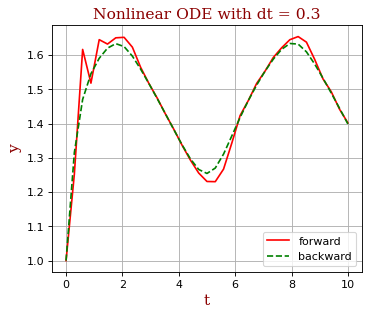

In [10]:

def f(y, t):
    return sin(y**3) + sin(t)

def df_dy(y, t):
    return 3*y**2*cos(y**3)


# Define parameters:
dt = 0.3
tot_time = 10
num_steps = ceil(tot_time / dt)
exact_steps = min(50000, 100 * num_steps)
time_vec = np.linspace(0, tot_time, num_steps+1)
time_vec_exact = np.linspace(0, tot_time, exact_steps+1)

# Allocate memory:
sol_forward = np.zeros((num_steps+1,))
sol_backward = np.zeros((num_steps+1,))

sol_forward[0] = 1
sol_backward[0] = 1

# Perform time-integration
for ii in range(1, num_steps+1):    
    
    # Forward Euler:
    sol_forward[ii] = sol_forward[ii - 1] + dt * f(sol_forward[ii - 1], time_vec[ii - 1])

    # Backward Euler:
    sol_backward[ii] = sol_backward[ii - 1] # initial guess
    for n in range(200):
        
        rhs = sol_backward[ii] - sol_backward[ii-1] - dt * f(sol_backward[ii], time_vec[ii])
        if np.abs(rhs) < 1e-8:
            break
        
        sol_backward[ii] -=  rhs / (1 - dt * df_dy(sol_backward[ii], time_vec[ii]))
    
    if n >= 199:
        print('Not converged!')
    


# plot with various axes scales
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

# Forward Euler
plt.figure(num=None, figsize=(5, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(time_vec, sol_forward, 'r', time_vec, sol_backward, 'g--')
plt.title('Nonlinear ODE with dt = ' + str(dt), fontdict=font)
plt.xlabel('t', fontdict=font)
plt.ylabel('y', fontdict=font)
plt.gca().legend(('forward','backward'))
plt.grid()
plt.show()


**MMMMM**

Adjust the slider to a time-step of $0.01$, how do the backward and forward Euler methods compare with each other? And why? Assume this solution is the ‘exact’ one. 

Gradually increase the time-step to $0.1$, $0.2$ and  $0.3$. What happens to the forward Euler method? How does it affect its accuracy? How does the backward Euler method remain consistent?

Increase the time-step to $0.5$. Do the methods remain accurate? Does stability guarantee accuracy? 